### Read the csv files in as dataframes

In [2]:
import pandas as pd

GRS = pd.read_csv("C:\\Users\\ks121\\OneDrive\\Documents\\Coding\\Shark_Identification\\Data\\Grey_Reef_Shark.csv")
BTRS = pd.read_csv("C:\\Users\\ks121\\OneDrive\\Documents\\Coding\\Shark_Identification\\Data\\Blacktip_Reef_Shark.csv")
BRS = pd.read_csv("C:\\Users\\ks121\\OneDrive\\Documents\\Coding\\Shark_Identification\\Data\\Blacktip_Shark.csv")
TS = pd.read_csv("C:\\Users\\ks121\\OneDrive\\Documents\\Coding\\Shark_Identification\\Data\\Tiger_Shark.csv")
STS = pd.read_csv("C:\\Users\\ks121\\OneDrive\\Documents\\Coding\\Shark_Identification\\Data\\Silvertip_Shark.csv")
WTRS = pd.read_csv("C:\\Users\\ks121\\OneDrive\\Documents\\Coding\\Shark_Identification\\Data\\Whitetip_Reef_Shark.csv")

### Takes a look to see if we have the urls we are looking for

In [3]:
GRS["image_url"].head()

0    https://inaturalist-open-data.s3.amazonaws.com...
1    https://inaturalist-open-data.s3.amazonaws.com...
2    http://static.inaturalist.org/photos/220236/me...
3    http://static.inaturalist.org/photos/220558/me...
4    http://static.inaturalist.org/photos/220560/me...
Name: image_url, dtype: object

### Stores the urls in np arrays

In [4]:
import os.path
import urllib.request

import numpy as np
from PIL import Image

GRS_PATH = "C:\\Users\\ks121\\OneDrive\\Documents\\Coding\\Shark_Identification\\Data\\Grey_Reef_Shark\\"
BTRS_PATH = "C:\\Users\\ks121\\OneDrive\\Documents\\Coding\\Shark_Identification\\Data\\Blacktip_Reef_Shark\\"
BTS_PATH = "C:\\Users\\ks121\\OneDrive\\Documents\\Coding\\Shark_Identification\\Data\\Blacktip_Shark\\"
TS_PATH = "C:\\Users\\ks121\\OneDrive\\Documents\\Coding\\Shark_Identification\\Data\\Tiger_Shark\\"
STS_PATH = "C:\\Users\\ks121\\OneDrive\\Documents\\Coding\\Shark_Identification\\Data\\Silvertip_Shark\\"
WTRS_PATH = "C:\\Users\\ks121\\OneDrive\\Documents\\Coding\\Shark_Identification\\Data\\Whitetip_Reef_Shark\\"

GRS_List = np.array([i for i in GRS["image_url"]])
BTRS_List = np.array([i for i in BTRS["image_url"]])
BTS_List = np.array([i for i in BRS["image_url"]])
TS_List = np.array([i for i in TS["image_url"]])
STS_List = np.array([i for i in STS["image_url"]])
WTRS_List = np.array([i for i in WTRS["image_url"]])

### Grabs and stores the images for each class in separate directories individually

In [6]:
for i, url in enumerate(GRS_List):
    urllib.request.urlretrieve(url, os.path.join(GRS_PATH, f"GRS_{i}.png"))

In [7]:
for i, url in enumerate(BTRS_List):
    urllib.request.urlretrieve(url, os.path.join(BTRS_PATH, f"BTRS_{i}.png"))

In [8]:
for i, url in enumerate(BTS_List):
    urllib.request.urlretrieve(url, os.path.join(BTS_PATH, f"BTS_{i}.png"))

In [9]:
for i, url in enumerate(TS_List):
    urllib.request.urlretrieve(url, os.path.join(TS_PATH, f"TS_{i}.png"))

In [10]:
for i, url in enumerate(STS_List):
    urllib.request.urlretrieve(url, os.path.join(STS_PATH, f"STS_{i}.png"))

In [11]:
for i, url in enumerate(WTRS_List):
    urllib.request.urlretrieve(url, os.path.join(WTRS_PATH, f"WTRS_{i}.png"))

### The images have different sizes. I want to look to see what kind of distribution they have
Also looks like some have shape issues and it exludes those from the plot

In [5]:
import cv2

width = []
height = []
aspect_ratio = []

for i, url in enumerate(GRS_List):
    img = cv2.imread(os.path.join(GRS_PATH, f"GRS_{i}.png"))
    shape = np.shape(img)

    try:
        width.append(shape[0])
        height.append(shape[1])
        aspect_ratio.append(shape[0]/shape[1])
    except:
        print(f"Something is up with {i}")

Something is up with 398
Something is up with 399


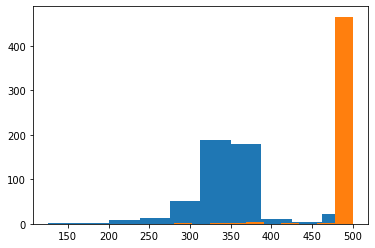

In [9]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.hist(width)
plt.hist(height)
#plt.hist(aspect_ratio)
plt.show()